# 第1部分 中国电动汽车市场销售量分析（202001-202402）

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel('./20200101-20240229之间的电动车销量.xlsx')
df.head()

年份  月份    厂商       车型         售价（万元）    销量
0  2020   1  上汽集团    荣威Ei5  13.98 - 15.38  3068
1  2020   1  华晨宝马  宝马5系新能源  49.99 - 54.65  3000
2  2020   1  上汽大众   帕萨特新能源  23.32 - 24.22  2217
3  2020   1  一汽奔腾  奔腾B30EV    0.00 - 0.00  2161
4  2020   1    蔚来    蔚来ES6  33.80 - 55.40  1754

In [2]:
# Convert to str type
df['年份'] = df['年份'].astype(str)
df['月份'] = df['月份'].astype(str)

## 1. 中国电动汽车月销售量(202001-202402)

In [3]:
month_sales = df.groupby(['年份', '月份'])['销量'].sum().reset_index()
month_sales['日期'] = pd.to_datetime(month_sales['年份'] + '-' + month_sales['月份']).dt.strftime("%Y-%m")  # 截取 年-月
month_sales = month_sales.sort_values('日期')

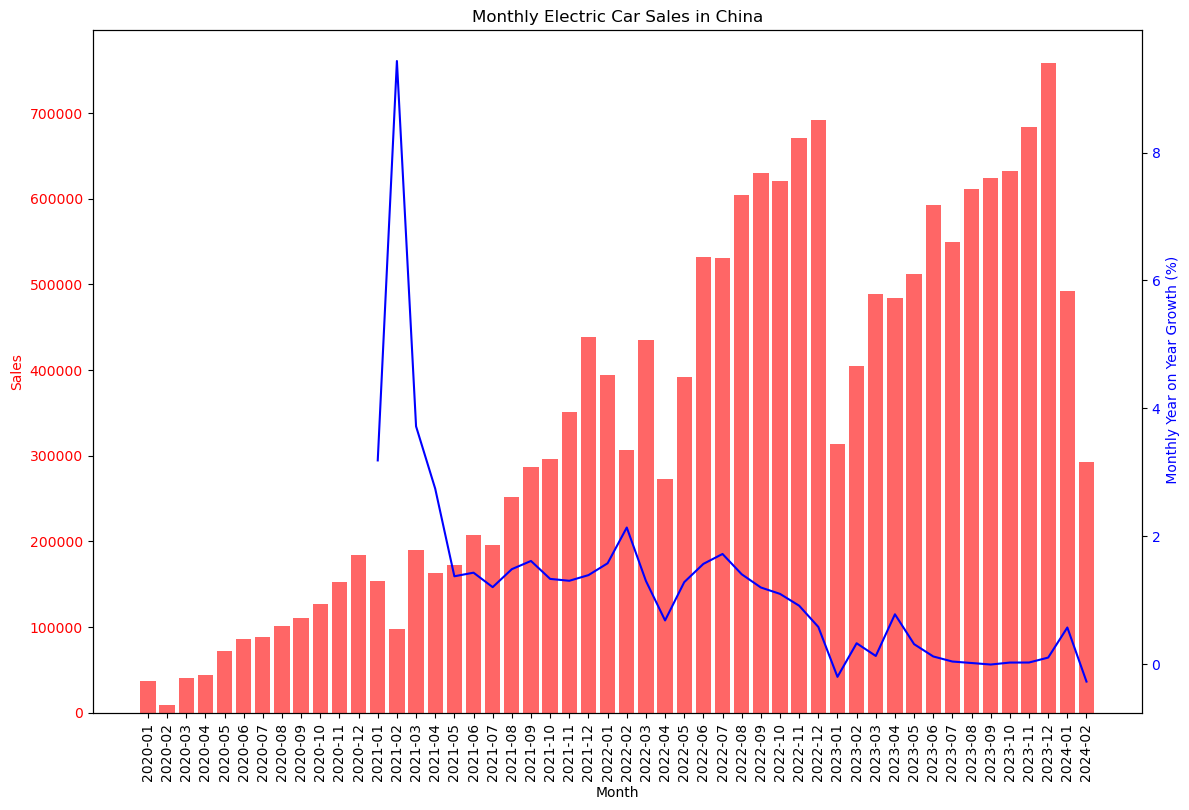

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate the year-on-year growth in sales
month_sales['同比'] = month_sales['销量'].pct_change(periods=12)

# Now plot with the updated 'month_sales' dataframe
fig, ax1 = plt.subplots(figsize=(12, 8))
# Plot sales bar chart
ax1.bar(month_sales['日期'].astype('str').to_list(), month_sales['销量'].to_list(), color='red', alpha=0.6)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

plt.xticks(rotation=90)

# Create a second y-axis
ax2 = ax1.twinx()


# Plot year-on-year line chart
ax2.plot(month_sales['日期'].astype('str').to_list(), month_sales['同比'].to_list(), color='blue')
ax2.set_ylabel(' Monthly Year on Year Growth (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Monthly Electric Car Sales in China')
plt.show()

21年至24年间，电动汽车销量总体成上涨趋势。上涨趋势21年已经开始显现。22年和23年持续性的告诉增长。23年12月达到峰值758,732辆。
每年1、2月是销量淡季。造成这样现象的原因是，按照现有市场规律，上一年度销量目标已经完成，各大经销商销售压力降低，促销力度减小。同时需求端提前在上一年度年底提前释放。
5、6月和10、11、12月是销量增长的关键几个月份。年底受市场需求影响和各经销商销售业绩的影响，一般都是上涨趋势。

## 2. 中国电动车年销售情况(2020-2023)

In [5]:
years_sales = df.groupby('年份')['销量'].sum().reset_index()

years_sales = years_sales[years_sales['年份'] != '2024']
# Subtract the previous row from the current row
years_sales['销量'].diff()
# Shift the column down by one row
years_sales['销量'].shift(1, axis=0)
# Calculate year-on-year growth
years_sales['同比'] = round(
    (years_sales['销量'].diff() / years_sales['销量'].shift(1)) * 100, 2)
years_sales

年份       销量      同比
0  2020  1050744     NaN
1  2021  2800616  166.54
2  2022  6076655  116.98
3  2023  6655004    9.52

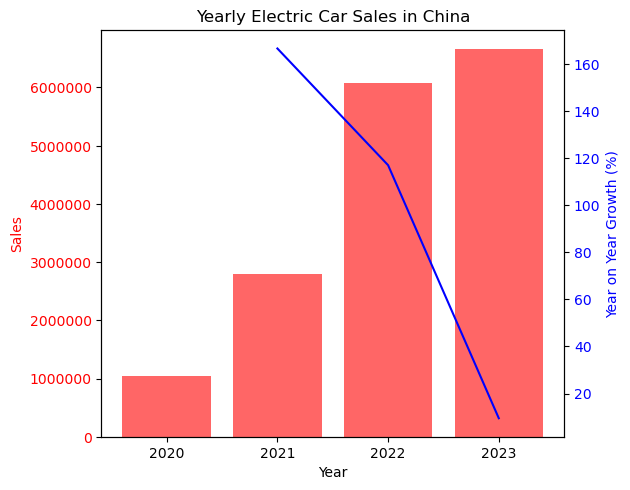

In [6]:
import matplotlib
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots()

# Plot sales bar chart
ax1.bar(years_sales['年份'].astype('str').to_list(), years_sales['销量'].to_list(), color='red', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

# Create a second y-axis
ax2 = ax1.twinx()

# Plot year-on-year line chart
ax2.plot(years_sales['年份'].astype('str').to_list(), years_sales['同比'].to_list(), color='blue')
ax2.set_ylabel('Year on Year Growth (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Yearly Electric Car Sales in China')
plt.show()

近4年的电动汽车增长持续。21年同比增幅最大，后面持续下降。受20年新能源电动汽车起步的影响，销量基数较小，21年新能源电动汽车发力。
22、23年也保持增长，但受销售基数的影响，同步增幅下降过快。可以看到22年其实是新能源汽车销量的关键一年，相对于20年增长了近5倍，增长率为478%

## 3. 中国电动车销量前20的车型(202010-202402)

In [7]:
top20_model = df.groupby(['车型', '售价（万元）', '厂商'])['销量'].sum(
).reset_index().sort_values('销量', ascending=False).reset_index(drop=True).head(20)

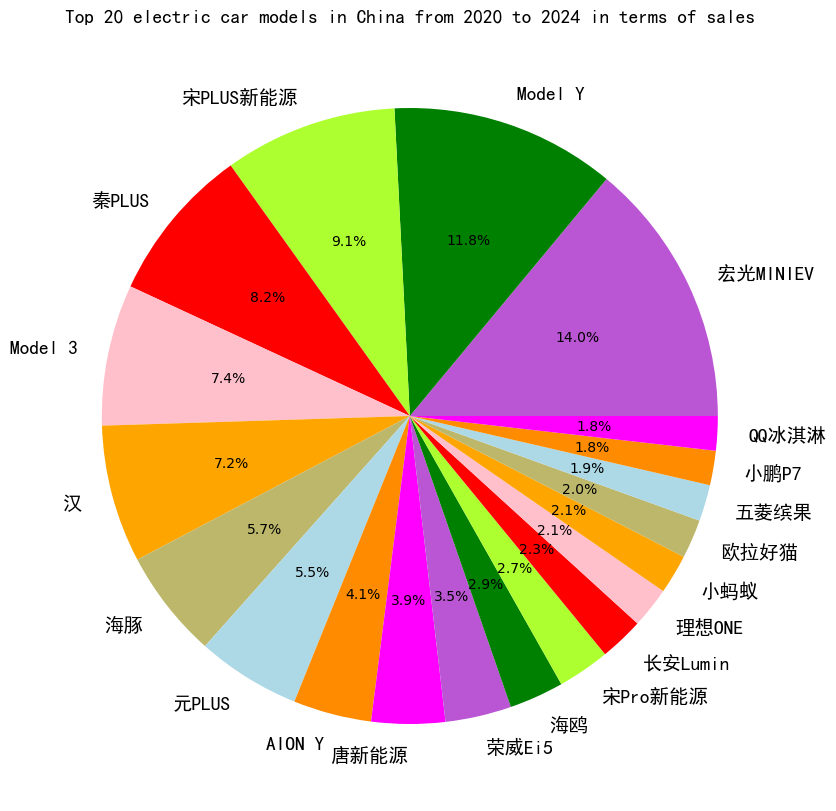

In [8]:
from matplotlib.font_manager import FontProperties

# Specify SimHei font to properly display Chinese characters
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare data
labels = top20_model['车型'].to_list()
sizes = top20_model['销量'].to_list()

# Set colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"]

# Draw a pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Modify font
for text in texts:
    text.set_fontproperties(font)

# Add title
plt.title('Top 20 electric car models in China from 2020 to 2024 in terms of sales', fontproperties=font)

plt.show()

中国电动车销量前20的车型(202010-202402)，很明显宏光MINEV车型最受歡迎，其次ModleY,宋PLUS第三，秦PLUS第四

In [9]:
# Lowest sale price of the top 20 electric car models over the last 4 years
top20_model['最低售价（万元）'] = pd.to_numeric(top20_model['售价（万元）'].apply(lambda x: x.split('-')[0]))
top20_model.sort_values('最低售价（万元）', ascending=False)

车型         售价（万元）      厂商       销量  最低售价（万元）
14     理想ONE  33.80 - 33.80      理想   210129     33.80
1    Model Y  25.89 - 36.89   特斯拉中国  1162424     25.89
4    Model 3  24.59 - 28.59   特斯拉中国   728595     24.59
18      小鹏P7  20.99 - 33.99    小鹏汽车   177542     20.99
9       唐新能源  17.98 - 30.98     比亚迪   379539     17.98
5          汉  16.98 - 29.98     比亚迪   710026     16.98
10     荣威Ei5  13.98 - 15.38    上汽集团   340951     13.98
2   宋PLUS新能源  12.98 - 20.98     比亚迪   893220     12.98
16      欧拉好猫  12.98 - 16.58   长城新能源   200557     12.98
7      元PLUS  11.98 - 16.78     比亚迪   536934     11.98
12   宋Pro新能源  10.98 - 16.58     比亚迪   269701     10.98
8     AION Y   9.98 - 18.98    广汽埃安   403386      9.98
6         海豚   9.98 - 13.98     比亚迪   560322      9.98
3      秦PLUS   7.98 - 17.98     比亚迪   806590      7.98
11        海鸥    6.98 - 8.98     比亚迪   281723      6.98
15       小蚂蚁    5.99 - 7.49   奇瑞新能源   203148      5.99
17      五菱缤果    5.98 - 8.88  上汽通用五菱   187597      5.98
13   长安Lumin    4.99 - 6.99    长安汽车   226917      4.99
0   宏光MINIEV    3.28 - 9.99  上汽通用五菱  1373184      3.28
19     QQ冰淇淋    2.99 - 4.69   奇瑞新能源   177211      2.99

20年-24年，销量最好的无疑是五菱的宏观MINIEV。小型电动代步车，还是很受欢迎的。
售价20万以上的有4个车型，10万以下的有9个车型。
近4年电动车销量前20的车来自于10家不同的厂商。

In [10]:
import pandas as pd

# Filter out the top 20 manufacturers by sales
top20_makers = top20_model.groupby('厂商')['销量'].sum().nlargest(20).index

# Create a new DataFrame to store the results
result = pd.DataFrame(index=top20_makers, columns=['总销量', 'Sales of Cars Less Than 50k', 'Sales of Cars 50k-100k', 'Sales of Cars 100k-150k', 'Sales of Cars 150k-200k', 'Sales of Cars More Than 200k'])

for maker in top20_makers:
    maker_data = top20_model[top20_model['厂商'] == maker]
    result.loc[maker, '总销量'] = maker_data['销量'].sum()
    result.loc[maker, 'Sales of Cars Less Than 50k'] = maker_data[maker_data['最低售价（万元）'] < 5]['销量'].sum()
    result.loc[maker, 'Sales of Cars 50k-100k'] = maker_data[(maker_data['最低售价（万元）'] >= 5) & (maker_data['最低售价（万元）'] < 10)]['销量'].sum()
    result.loc[maker, 'Sales of Cars 100k-150k'] = maker_data[(maker_data['最低售价（万元）'] >= 10) & (maker_data['最低售价（万元）'] < 15)]['销量'].sum()
    result.loc[maker, 'Sales of Cars 150k-200k'] = maker_data[(maker_data['最低售价（万元）'] >= 15) & (maker_data['最低售价（万元）'] < 20)]['销量'].sum()
    result.loc[maker, 'Sales of Cars More Than 200k'] = maker_data[maker_data['最低售价（万元）'] >= 20]['销量'].sum()

result.to_csv('result.csv')

In [11]:
df2 = pd.read_csv('./result.csv')

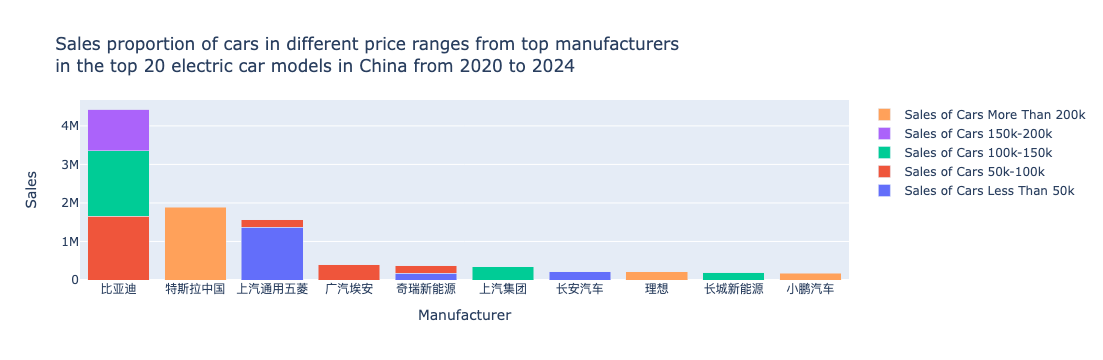

In [12]:
import plotly.graph_objects as go

# Create a new stacked bar chart
fig = go.Figure()

# Add a new layer for each price range
for column in df2.columns[2:]:
    fig.add_trace(go.Bar(
        x=df2['厂商'],
        y=df2[column],
        name=column
    ))

# Update layout settings to stack and add title and labels
fig.update_layout(
    title_text="Sales proportion of cars in different price ranges from top manufacturers<br>in the top 20 electric car models in China from 2020 to 2024",
    barmode='stack',
    xaxis=dict(
        title='Manufacturer',
    ),
    yaxis=dict(
        title='Sales',
    )
)

# Show figure
fig.show()

In [13]:
# The corresponding car companies of the top 20 electric car models by sales
top20_model_company = top20_model.groupby(['厂商'])['销量'].sum().reset_index().sort_values('销量', ascending=False)

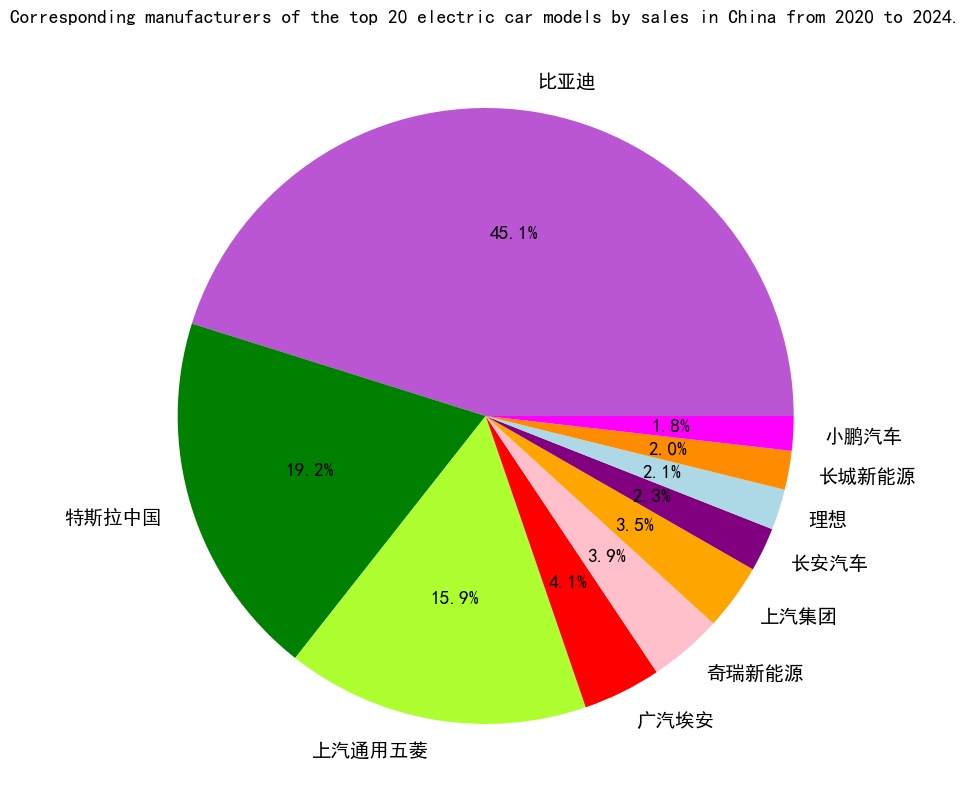

In [14]:
from matplotlib.font_manager import FontProperties

# Specify the font as SimHei to properly display Chinese
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create a pie chart with a size of 10x10
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare the data
labels = top20_model_company['厂商'].to_list()
sizes = top20_model_company['销量'].to_list()

# Set the colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "purple", "LightBlue", "DarkOrange", "Magenta"]

# Create the pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Modify the font
for text in texts:
    text.set_fontproperties(font)
for autotext in autotexts:
    autotext.set_fontproperties(font)

# Add a title
plt.title('Corresponding manufacturers of the top 20 electric car models by sales in China from 2020 to 2024.', fontproperties=font)

plt.show()

从上图表，销量前20的车型对应的车企，比亚迪的8款车型占了近45%，特斯拉的两款车型也占了近20%，五菱以两款车型也占了近16%

## 4. 电动车销量前20的车企(202001-202402)

In [15]:
top20_company = df.groupby('厂商')['销量'].sum().reset_index(
).sort_values('销量', ascending=False).head(20)

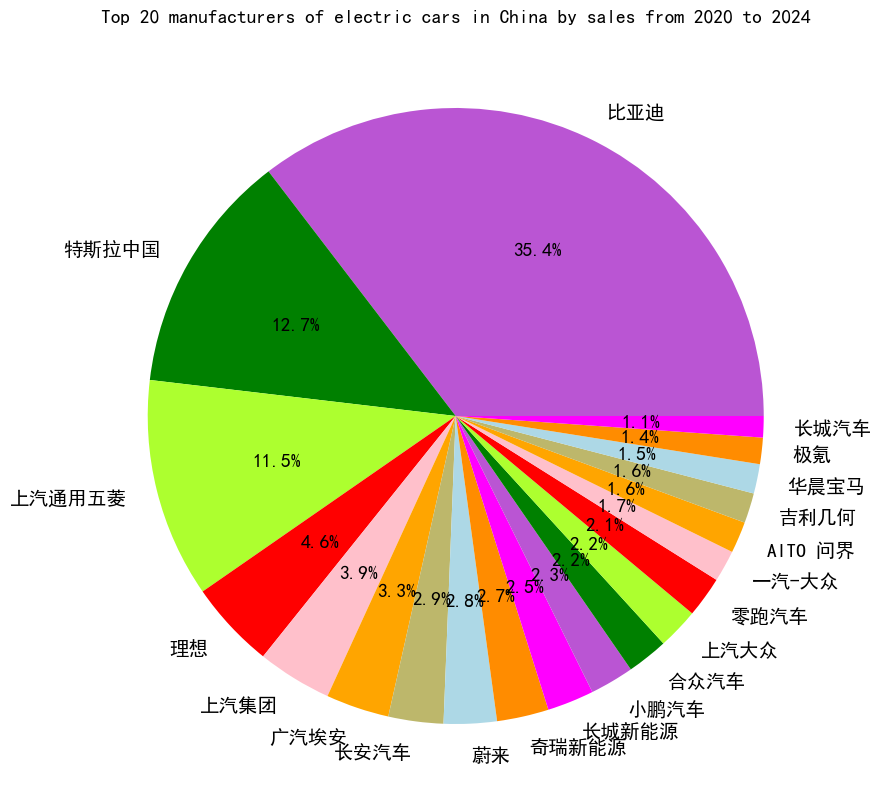

In [16]:
from matplotlib.font_manager import FontProperties

# Specify the font as SimHei to properly display Chinese
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create a pie chart with a size of 10x10
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare the data
labels = top20_company['厂商'].to_list()
sizes = top20_company['销量'].to_list()

# Set the colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"]

# Create the pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Modify the font
for text in texts:
    text.set_fontproperties(font)
for autotext in autotexts:
    autotext.set_fontproperties(font)

# Add a title
plt.title('Top 20 manufacturers of electric cars in China by sales from 2020 to 2024', fontproperties=font)

plt.show()

## 5. 2023年电动车销量前10厂商汽车车型销量分布

In [17]:
df_2023 = df[df["年份"] == "2023"]
# Top 10 manufacturers by sales in 2023
df_2023_top10_company = df_2023.groupby('厂商')['销量'].sum().reset_index().sort_values('销量', ascending=False).head(10)
df_2023_top10_company

厂商       销量
60     比亚迪  2563968
65   特斯拉中国   603664
14  上汽通用五菱   423073
66      理想   371923
54    广汽埃安   256641
78    长安汽车   214549
82    零跑汽车   144155
70      蔚来   138527
11    上汽大众   122655
69    腾势汽车   117978

In [18]:
# The models corresponding to the top 10 manufacturers by electric car sales in 2023
df_2023_top10_company_model = df_2023[df_2023['厂商'].isin(df_2023_top10_company['厂商'])]

In [19]:
# outer_data and inter_data
outer_data = df_2023_top10_company_model.groupby(['厂商', '车型'])['销量'].sum().reset_index().sort_values('厂商', ascending=False)
inter_data = outer_data.groupby('厂商')['销量'].sum().reset_index().sort_values('厂商', ascending=False)

In [20]:
outer_data

厂商             车型      销量
54    零跑汽车          零跑T03   38454
53    零跑汽车          零跑C11   80616
52    零跑汽车          零跑C01   25085
51    长安汽车     长安欧尚A600EV       1
50    长安汽车     长安奔奔E-Star    8153
49    长安汽车  长安UNI-V 智电iDD   21880
48    长安汽车  长安UNI-K 智电iDD    6570
47    长安汽车        长安Lumin  136764
46    长安汽车          逸动新能源    9279
45    长安汽车        欧尚Z6新能源   31902
41      蔚来          蔚来ES7    6524
38      蔚来          蔚来EC6   11174
39      蔚来          蔚来EC7    3661
40      蔚来          蔚来ES6   56539
42      蔚来          蔚来ES8   14138
43      蔚来          蔚来ET5   40848
44      蔚来          蔚来ET7    5643
37    腾势汽车           腾势D9  117978
36      理想          理想ONE    5467
35      理想           理想L9  114377
34      理想           理想L8  117990
33      理想           理想L7  134089
32   特斯拉中国        Model Y  456394
31   特斯拉中国        Model 3  147270
28     比亚迪          秦PLUS  434213
30     比亚迪          驱逐舰05   85806
29     比亚迪           秦新能源   30182
27     比亚迪             海鸥  239270
14     比亚迪           元pro   11394
19     比亚迪          护卫舰07   66262
13     比亚迪          元PLUS  309835
26     比亚迪             海豹   94459
16     比亚迪        宋MAX新能源    3720
17     比亚迪       宋PLUS新能源  390213
18     比亚迪        宋Pro新能源  209690
15     比亚迪           唐新能源  140117
20     比亚迪          比亚迪D1     806
21     比亚迪          比亚迪e2   18970
22     比亚迪          比亚迪e3    1348
23     比亚迪          比亚迪e6     229
24     比亚迪              汉  227746
25     比亚迪             海豚  299708
12    广汽埃安        Aion LX     618
11    广汽埃安         AION Y  235717
10    广汽埃安         AION V   20306
9   上汽通用五菱      宝骏KiWi EV    5639
8   上汽通用五菱       宏光MINIEV  237863
7   上汽通用五菱         五菱荣光EV    4210
6   上汽通用五菱           五菱缤果  167764
5   上汽通用五菱     五菱Air ev晴空    7597
3     上汽大众         帕萨特新能源   11655
2     上汽大众         大众ID.3   75731
1     上汽大众         ID.6 X    6243
4     上汽大众         途观L新能源    4864
0     上汽大众         ID.4 X   24162

In [21]:
inter_data

厂商       销量
9    零跑汽车   144155
8    长安汽车   214549
7      蔚来   138527
6    腾势汽车   117978
5      理想   371923
4   特斯拉中国   603664
3     比亚迪  2563968
2    广汽埃安   256641
1  上汽通用五菱   423073
0    上汽大众   122655

In [22]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


In [23]:
from pyecharts.charts import Pie
from pyecharts import options as opts

(
    Pie()
    .add(
        series_name="销量",
        data_pair=[list(z) for z in zip(inter_data['厂商'], inter_data['销量'])],
        radius=[0, "50%"],
        label_opts=opts.LabelOpts(position="inner"),
    )
    .add(
        series_name="销量",
        radius=["50%", "80%"],
        data_pair=[list(z) for z in zip(outer_data['车型'], outer_data['销量'])],
    )
    .set_colors(["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"])
    .set_global_opts(title_opts=opts.TitleOpts(title="2023 Top 10 Electric Car Manufacturers and Model Sales Distribution"), legend_opts=opts.LegendOpts(pos_left="left", orient="vertical", is_show=False))
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        )
    )
    .render("Chart of Sales Distribution of Car Models for Top 10 Manufacturers in 2023.html")
)

'/Users/haruko/项目/Chart of Sales Distribution of Car Models for Top 10 Manufacturers in 2023.html'

2023年电动车前10厂商汽车销量中，比亚迪排名第一且优势明显，一家独大。旗下秦PLUS车型销量最好。
比亚迪车型多样，但销量主要来自于价位中低端车型，高端车型销量不佳。

特斯拉主要高端车型，车型单一，ModleY销量好于Model3，且2023年ModleY销量排名第二，不及比亚迪旗下秦PLUS。

通用五菱低端车型，车型单一，宏光MINIEV销量最好。
理想的三款车型，销售量相近，说明用户忠实度较高。

整体来说，中国电动车头部车企车型及销售策略不同，用户群体差异也较为明显。

销量尾部的汽车厂商生存艰难，对于这部分车企做好产品研发，优化市场营销，维护用户口碑才能改善困境。

# 第2部分 中国汽车市场销售量分析（202001-202402）

In [24]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [25]:
df1 =pd.read_excel(r"./20200101-20240229之间的车型销量.xlsx")
df1.head(5)

年份  月份     厂商    车型         售价（万元）     销量
0  2020   1   东风日产    轩逸  10.86 - 17.49  37255
1  2020   1   上汽大众    朗逸   8.00 - 15.19  35898
2  2020   1   一汽丰田   卡罗拉  10.98 - 15.98  34040
3  2020   1  一汽-大众    宝来  11.20 - 15.70  29878
4  2020   1   长城汽车  哈弗H6   9.89 - 15.70  26702

## 1. 中国汽车年销量情況（2020-2023）

In [26]:
# Filter out the data for the year 2024
df2 = df1[df1['年份'] != 2024]

# Group by 'Year' and calculate the total sales for each year
annual_sales = df2.groupby('年份')['销量'].sum()

# Calculate the year-over-year percent change in sales
annual_sales_pct_change = annual_sales.pct_change()

# Print the total annual sales and their year-over-year percent change
print(annual_sales,annual_sales_pct_change)

年份
2020    19750231
2021    20892501
2022    23090475
2023    21684678
Name: 销量, dtype: int64 年份
2020         NaN
2021    0.057836
2022    0.105204
2023   -0.060882
Name: 销量, dtype: float64


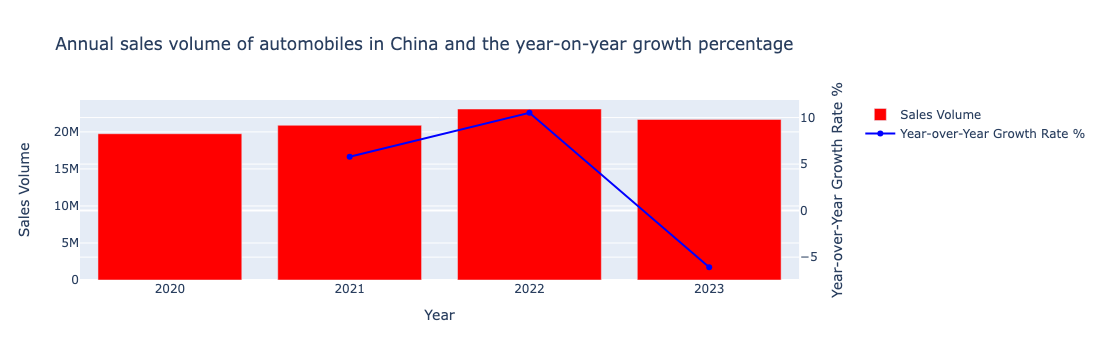

In [27]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate the year-over-year growth rate and convert it to percentage
annual_sales_pct_change_percent = annual_sales_pct_change * 100

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add a bar plot
fig.add_trace(go.Bar(x=annual_sales.index.astype('str').to_list(), 
                     y=annual_sales.to_list(), 
                     name='Sales Volume',
                     marker_color='red'), 
                     secondary_y=False)

# Add a line plot
fig.add_trace(go.Scatter(x=annual_sales_pct_change_percent.index.astype('str').to_list(), 
                         y=annual_sales_pct_change_percent.to_list(), 
                         name='Year-over-Year Growth Rate %',
                         line=dict(color='blue')), 
                         secondary_y=True)

# Set the chart title and axis titles
fig.update_layout(title_text="Annual sales volume of automobiles in China and the year-on-year growth percentage")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Sales Volume", secondary_y=False)
fig.update_yaxes(title_text="Year-over-Year Growth Rate %", secondary_y=True)

# Display the chart
fig.show()

2020-2023年，中国汽车销量增长不高，2022年增长10%，2023年下降6%，说明增长空间趋于饱和。未来随着中国人口减少和经济增长动力不足问题，销量下降趋势可能会进一步持续。

## 2.中国汽车月销量同比数据（202001-202402）

In [28]:
# Create a new column 'YearMonth', representing the combination of year and month
df1['年月'] = df1['年份'].astype(str) + df1['月份'].astype(str).str.zfill(2)

# Group by 'YearMonth' and calculate the total sales for each month
monthly_sales = df1.groupby('年月')['销量'].sum()

# Calculate the month-over-month percent change in sales
monthly_sales_pct_change = monthly_sales.pct_change()

# Print the total monthly sales and their month-over-month percent change
print(monthly_sales,monthly_sales_pct_change)

年月
202001    1596470
202002     216763
202003    1020824
202004    1506971
202005    1669656
202006    1742378
202007    1653933
202008    1745575
202009    2023926
202010    2042956
202011    2222866
202012    2307913
202101    1968394
202102    1115614
202103    1814067
202104    1666638
202105    1612952
202106    1501856
202107    1479454
202108    1526076
202109    1705206
202110    1961017
202111    2164644
202112    2376583
202201    2140050
202202    1451381
202203    1819813
202204     942539
202205    1577056
202206    2165958
202207    2125896
202208    2221647
202209    2275494
202210    2172374
202211    2007402
202212    2190865
202301    1295097
202302    1396501
202303    1593454
202304    1635995
202305    1685966
202306    1884377
202307    1781580
202308    1922495
202309    2019445
202310    2032470
202311    2077155
202312    2360143
202401    2034527
202402    1111541
Name: 销量, dtype: int64 年月
202001         NaN
202002   -0.864224
202003    3.709402
202004    0.47

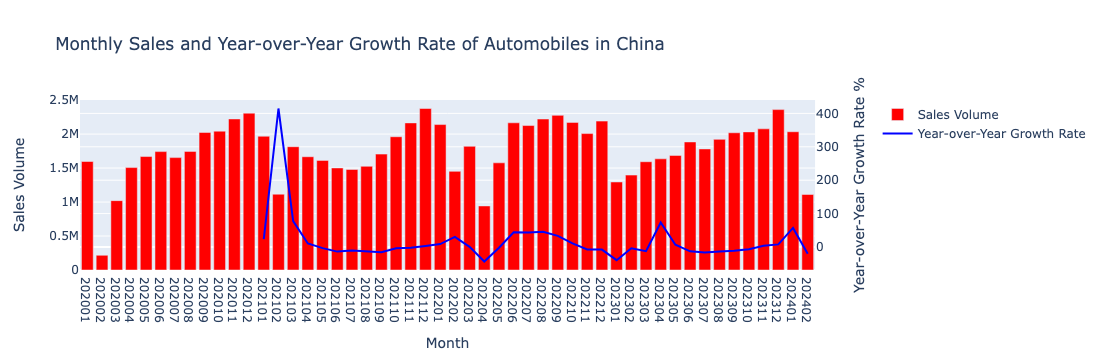

In [29]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate the year-over-year growth rate and convert it to percentage
monthly_sales_yoy_change_percent = monthly_sales.pct_change(periods=12) * 100

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add a bar plot
fig.add_trace(go.Bar(x=monthly_sales.index.astype('str').to_list(), 
                     y=monthly_sales.to_list(), 
                     name='Sales Volume',
                     marker_color='red'), 
                     secondary_y=False)

# Add a line plot
fig.add_trace(go.Scatter(x=monthly_sales_yoy_change_percent.index.astype('str').to_list(), 
                         y=monthly_sales_yoy_change_percent.to_list(), 
                         name='Year-over-Year Growth Rate',
                         line=dict(color='blue')), 
                         secondary_y=True)

# Set the chart title and axis titles
fig.update_layout(title_text="Monthly Sales and Year-over-Year Growth Rate of Automobiles in China")
fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Sales Volume", secondary_y=False)
fig.update_yaxes(title_text="Year-over-Year Growth Rate %", secondary_y=True)

# Display the chart
fig.show()

202001-202402期间，中国汽车销售量总体积极性特征明显，6-12月下半年为旺季。2023年的下半年销售量明显不如2022年下半年。

## 3.中国新能源汽车的渗透率（202201-202402）

In [30]:
import pandas as pd

# Read the sales data for new energy vehicles and total vehicles
df_nev = pd.read_excel('./20200101-20240229之间的电动车销量.xlsx')
df_total = pd.read_excel('./20200101-20240229之间的车型销量.xlsx')

# Filter out the data for the year 2024
df_nev_filtered = df_nev[df_nev['年份'] != 2024]
df_total_filtered = df_total[df_total['年份'] != 2024]

# Group by 'Year' and calculate the total sales for each year
annual_sales_nev = df_nev_filtered.groupby('年份')['销量'].sum()
annual_sales_total = df_total_filtered.groupby('年份')['销量'].sum()

# Calculate the penetration rate of new energy vehicles
nev_penetration_rate = annual_sales_nev / annual_sales_total

# Print the new energy vehicles penetration rate for each year
print(nev_penetration_rate)

年份
2020    0.053202
2021    0.134049
2022    0.263167
2023    0.306899
Name: 销量, dtype: float64


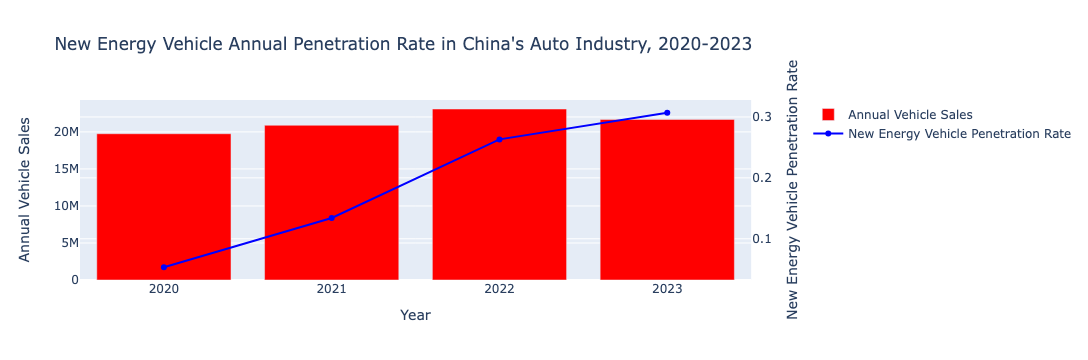

In [31]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add a bar plot for annual sales
fig.add_trace(go.Bar(x=annual_sales_total.index.astype('str').to_list(), 
                     y=annual_sales_total.to_list(), 
                     name='Annual Vehicle Sales',
                     marker_color='red'), 
                     secondary_y=False)

# Add a line plot for new energy vehicle penetration rate
fig.add_trace(go.Scatter(x=nev_penetration_rate.index.astype('str').to_list(), 
                         y=nev_penetration_rate.to_list(), 
                         name='New Energy Vehicle Penetration Rate',
                         line=dict(color='blue')), 
                         secondary_y=True)

# Set the chart title and axis titles
fig.update_layout(title_text="New Energy Vehicle Annual Penetration Rate in China's Auto Industry, 2020-2023")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Annual Vehicle Sales", secondary_y=False)
fig.update_yaxes(title_text="New Energy Vehicle Penetration Rate", secondary_y=True)

# Display the chart
fig.show()

渗透率2021-2022年变化明显，但2023年增速放缓。2024年只统计了1月份和2月份的数据，但预期渗透率应该不超过35%。

In [32]:
## 中国汽车行业新能源汽车月度渗透率（202001-202402）
import pandas as pd

# 读取新能源汽车销售数据和总汽车销售数据
df_nev = pd.read_excel('./20200101-20240229之间的电动车销量.xlsx')
df_total = pd.read_excel('./20200101-20240229之间的车型销量.xlsx')

# 创建一个新列 '年月'，表示年和月的组合
df_nev['年月'] = df_nev['年份'].astype(str) + df_nev['月份'].astype(str).str.zfill(2)
df_total['年月'] = df_total['年份'].astype(str) + df_total['月份'].astype(str).str.zfill(2)

# 根据 '年月' 分组，计算每个月的销量总和
monthly_sales_nev = df_nev.groupby('年月')['销量'].sum()
monthly_sales_total = df_total.groupby('年月')['销量'].sum()

# 计算新能源汽车的渗透率
nev_penetration_rate = monthly_sales_nev / monthly_sales_total

# 输出每个月的新能源汽车渗透率
print(nev_penetration_rate)

年月
202001    0.022916
202002    0.043218
202003    0.039366
202004    0.028821
202005    0.043390
202006    0.049038
202007    0.053635
202008    0.058054
202009    0.054378
202010    0.062207
202011    0.068647
202012    0.079509
202101    0.077739
202102    0.087601
202103    0.104476
202104    0.097476
202105    0.106445
202106    0.138039
202107    0.131905
202108    0.164776
202109    0.168434
202110    0.150931
202111    0.162107
202112    0.184371
202201    0.183999
202202    0.210939
202203    0.239256
202204    0.289393
202205    0.248005
202206    0.245409
202207    0.249583
202208    0.271808
202209    0.276989
202210    0.285369
202211    0.333797
202212    0.315483
202301    0.242102
202302    0.289798
202303    0.306828
202304    0.295952
202305    0.303374
202306    0.314608
202307    0.308508
202308    0.318132
202309    0.308694
202310    0.311062
202311    0.329181
202312    0.321477
202401    0.241702
202402    0.263005
Name: 销量, dtype: float64


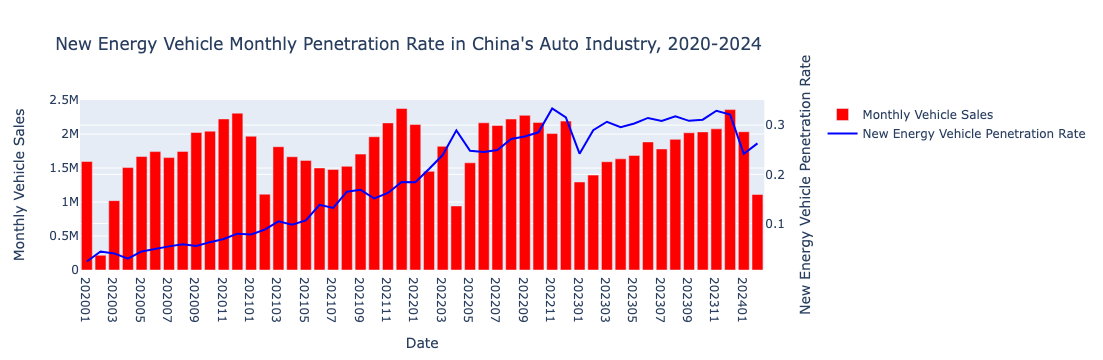

In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add a bar plot for monthly sales
fig.add_trace(go.Bar(x=monthly_sales_total.index.to_list(), 
                     y=monthly_sales_total.to_list(), 
                     name='Monthly Vehicle Sales',
                     marker_color='red'), 
                     secondary_y=False)

# Add a line plot for new energy vehicle penetration rate
fig.add_trace(go.Scatter(x=nev_penetration_rate.index.to_list(), 
                         y=nev_penetration_rate.to_list(), 
                         name='New Energy Vehicle Penetration Rate',
                         line=dict(color='blue')), 
                         secondary_y=True)

# Set the chart title and axis titles
fig.update_layout(title_text="New Energy Vehicle Monthly Penetration Rate in China's Auto Industry, 2020-2024")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Monthly Vehicle Sales", secondary_y=False)
fig.update_yaxes(title_text="New Energy Vehicle Penetration Rate", secondary_y=True)

# Display the chart
fig.show()

虽然1月份和2月份是淡季，但是2024年1月份和2月份汽车销售和渗透率数据已经跌到2021年水平。不仅仅是增速放缓的问题，而是出现了实质性过剩问题。相比于电车，中国居民居民对购买油车的需求提升。

## 4.中国汽车销量前20的车型（202001-202402）

In [34]:
top20_model = df1.groupby(['车型', '售价（万元）', '厂商'])['销量'].sum(
).reset_index().sort_values('销量', ascending=False).reset_index(drop=True).head(20)

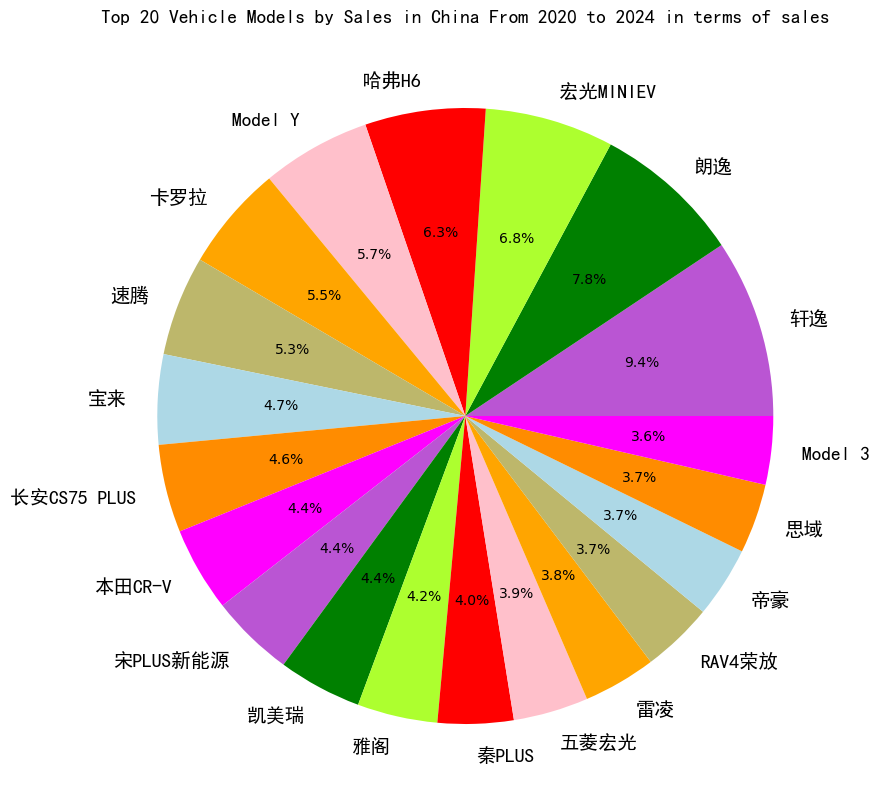

In [35]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# Specify the font as SimHei, to properly display Chinese characters
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare data
labels = top20_model['车型'].to_list()
sizes = top20_model['销量'].to_list()

# Set colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"]

# Draw pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Modify font
for text in texts:
    text.set_fontproperties(font)

# Add title
plt.title('Top 20 Vehicle Models by Sales in China From 2020 to 2024 in terms of sales', fontproperties=font)

plt.show()

中国汽车销量前20的车型（202001-202402）
轩逸9.4%，排名第一，好开、平顺、省油、悬挂软，舒适度高，这是日系车的优点，也是轩逸的优点。
朗逸7.8%，排名第二，而底盘扎实、悬挂硬朗，加速激进，这些德系车的亮点，朗逸也不缺。
五菱宏光MINIEV作为电动车，6.8%排名第三，车身小灵活、颜色搭配多、价格便宜、用电成本低。

哈弗H6排名第4，性价比高，空间大，10万人民币的售价20万人民币的汽车外观。
ModleY排名第五，5.7%。

总体来说，还是以油车为主，且车型销售量占比差距不大，没有一家独大的事情。

In [36]:
# Situation of the lowest selling price of the top 20 vehicles in terms of sales over the past 4 years
top20_model['最低售价（万元）'] = pd.to_numeric(top20_model['售价（万元）'].apply(lambda x: x.split('-')[0]))
top20_model.sort_values('最低售价（万元）', ascending=False)

车型         售价（万元）      厂商       销量  最低售价（万元）
4       Model Y  25.89 - 36.89   特斯拉中国  1162424     25.89
19      Model 3  24.59 - 28.59   特斯拉中国   728595     24.59
9        本田CR-V  18.59 - 26.39    东风本田   900901     18.59
16       RAV4荣放  17.58 - 26.38    一汽丰田   760662     17.58
11          凯美瑞  17.18 - 26.98    广汽丰田   891441     17.18
12           雅阁  16.98 - 25.98    广汽本田   854964     16.98
18           思域  12.99 - 18.79    东风本田   741356     12.99
10     宋PLUS新能源  12.98 - 20.98     比亚迪   893220     12.98
6            速腾  12.79 - 17.29   一汽-大众  1066102     12.79
8   长安CS75 PLUS  11.79 - 15.49    长安汽车   937265     11.79
7            宝来  11.20 - 15.70   一汽-大众   957971     11.20
15           雷凌  11.18 - 15.28    广汽丰田   776330     11.18
5           卡罗拉  10.98 - 15.98    一汽丰田  1124960     10.98
0            轩逸  10.86 - 17.49    东风日产  1900958     10.86
3          哈弗H6   9.89 - 15.70    长城汽车  1283072      9.89
1            朗逸   8.00 - 15.19    上汽大众  1585910      8.00
13        秦PLUS   7.98 - 17.98     比亚迪   806590      7.98
17           帝豪   6.99 - 12.98    吉利汽车   756083      6.99
14         五菱宏光    4.60 - 5.99  上汽通用五菱   799613      4.60
2      宏光MINIEV    3.28 - 9.99  上汽通用五菱  1373184      3.28

In [37]:
import pandas as pd

# Select the top 20 manufacturers by sales
top20_makers = top20_model.groupby('厂商')['销量'].sum().nlargest(20).index

# Create a new DataFrame to store the results
result = pd.DataFrame(index=top20_makers, columns=['总销量', 'Sales of Cars Below 50k', 'Sales of 50k-100k Cars', 'Sales of 100k-150k Cars', 'Sales of 150k-200k Cars', 'Sales of Cars Above 200k'])

for maker in top20_makers:
    maker_data = top20_model[top20_model['厂商'] == maker]
    result.loc[maker, '总销量'] = maker_data['销量'].sum()
    result.loc[maker, 'Sales of Cars Below 50k'] = maker_data[maker_data['最低售价（万元）'] < 5]['销量'].sum()
    result.loc[maker, 'Sales of 50k-100k Cars'] = maker_data[(maker_data['最低售价（万元）'] >= 5) & (maker_data['最低售价（万元）'] < 10)]['销量'].sum()
    result.loc[maker, 'Sales of 100k-150k Cars'] = maker_data[(maker_data['最低售价（万元）'] >= 10) & (maker_data['最低售价（万元）'] < 15)]['销量'].sum()
    result.loc[maker, 'Sales of 150k-200k Cars'] = maker_data[(maker_data['最低售价（万元）'] >= 15) & (maker_data['最低售价（万元）'] < 20)]['销量'].sum()
    result.loc[maker, 'Sales of Cars Above 200k'] = maker_data[maker_data['最低售价（万元）'] >= 20]['销量'].sum()

result.to_csv('result2.csv')

In [38]:
df3 = pd.read_csv('./result2.csv')

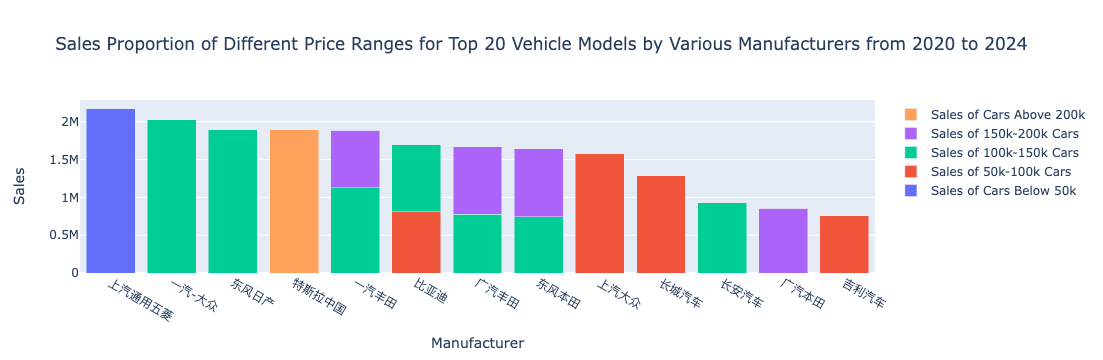

In [39]:
import plotly.graph_objects as go

# Create a new stacked bar chart
fig = go.Figure()

# For each price range, add a new layer
for column in df3.columns[2:]:
    fig.add_trace(go.Bar(
        x=df3['厂商'],
        y=df3[column],
        name=column
    ))

# Update layout settings to stack and add title and labels
fig.update_layout(
    title_text="Sales Proportion of Different Price Ranges for Top 20 Vehicle Models by Various Manufacturers from 2020 to 2024",
    barmode='stack',
    xaxis=dict(
        title='Manufacturer',
    ),
    yaxis=dict(
        title='Sales',
    )
)

# Display the figure
fig.show()

2020-2024年，销量前20的车型对应的厂商，由13家车企组成。基本均为低于20万人民币售价的中低价位车型。
第一名是上汽通用五菱，第二名是一汽大众，第三名东风日产，第四名特斯拉中国，第五名一汽丰田，第六名比亚迪。
说明，五菱低端价位车型很受欢迎，且均为低于5万人民币的车型。
德系和日系车主打中端价位市场。
比亚迪中国汽车整体销量前20的车型是5-15万人民币的车型。虽然在中国新能源汽车市场里一家独大，但其爆款车型销量不及五菱和德系、日系油车。

吉利排名最后，说明缺失知名度高的爆款车型。长安汽车排名第11名。


In [40]:
# The manufacturers of the top 20 car models by sales
top20_model_company = top20_model.groupby(['厂商'])['销量'].sum().reset_index().sort_values('销量', ascending=False)

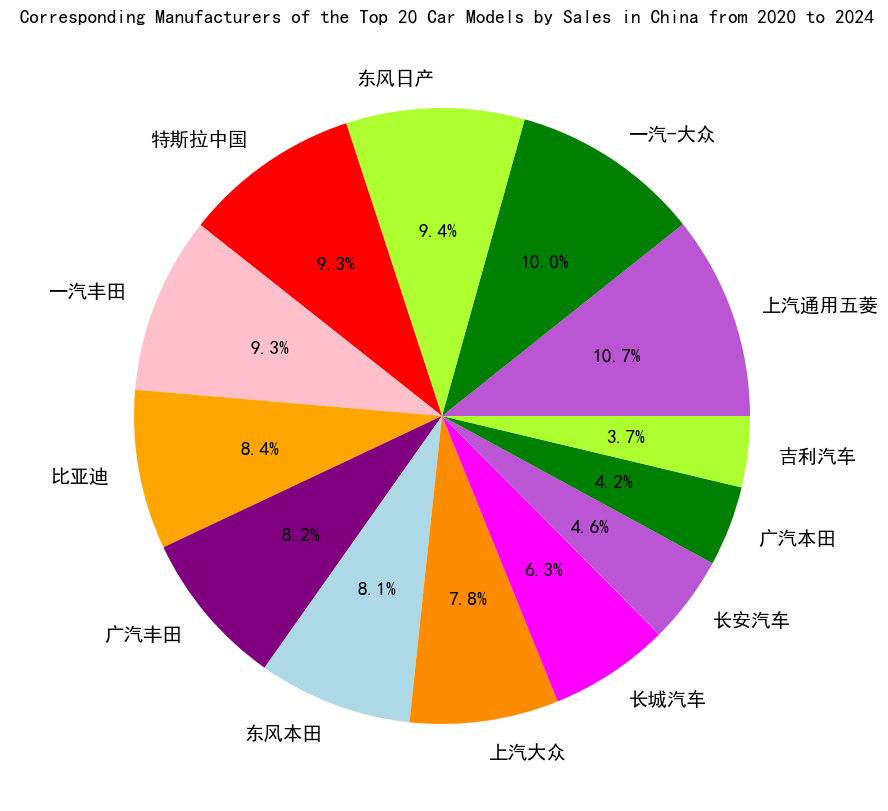

In [41]:
from matplotlib.font_manager import FontProperties

# Specify the font as SimHei, to properly display Chinese characters
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create a pie chart with a size of 10x10
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare the data
labels = top20_model_company['厂商'].to_list()
sizes = top20_model_company['销量'].to_list()

# Set the colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "purple", "LightBlue", "DarkOrange", "Magenta"]

# Draw the pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Change the font
for text in texts:
    text.set_fontproperties(font)
for autotext in autotexts:
    autotext.set_fontproperties(font)

# Add a title
plt.title(' Corresponding Manufacturers of the Top 20 Car Models by Sales in China from 2020 to 2024', fontproperties=font)

plt.show()

前20的车型的销量，差距不大，各厂商占比拉不开太大差距。

## 5. 中国汽车销量前20的车企

In [42]:
top20_company = df1.groupby('厂商')['销量'].sum().reset_index(
).sort_values('销量', ascending=False).head(20)

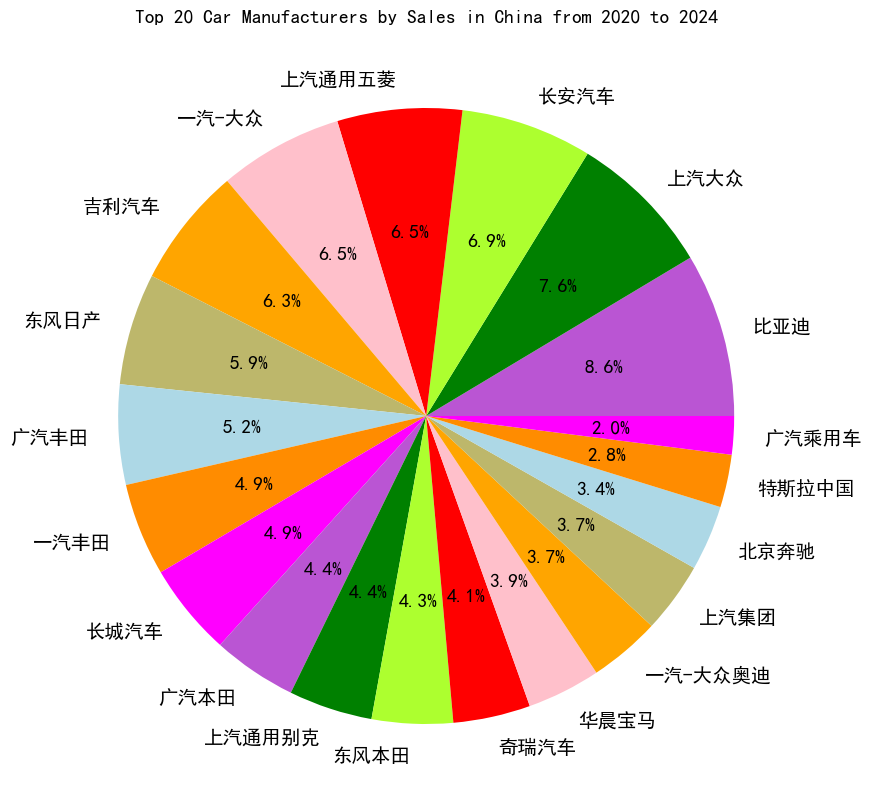

In [43]:
from matplotlib.font_manager import FontProperties

# Specify the font as SimHei, to properly display Chinese characters
font = FontProperties(fname=r"./simhei.ttf", size=14)

# Create a pie chart with a size of 10x10
fig, ax = plt.subplots(figsize=(10, 10))

# Prepare the data
labels = top20_company['厂商'].to_list()
sizes = top20_company['销量'].to_list()

# Set the colors
colors = ["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"]

# Draw the pie chart
patches, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Change the font
for text in texts:
    text.set_fontproperties(font)
for autotext in autotexts:
    autotext.set_fontproperties(font)

# Add a title
plt.title('Top 20 Car Manufacturers by Sales in China from 2020 to 2024', fontproperties=font)

plt.show()

2020-2024年，与销量前20的车型对应的销售量和厂商相比，销量前20的厂商排名是，比亚迪8.6%第一名，上汽大众7.6%第2，长安汽车6.9%第3，五菱6.5%第4，大众6.5%第5，吉利汽车6.3%第6。

这说明，虽然日系汽车的轩逸这一款车型销量量很好，但在中国整体汽车市场上优势不及德系。
比亚迪排名第一，说明比亚迪的中低价位的电动车品牌最受认可。
长安汽车和吉利汽车虽然缺少爆款车型，但是排名靠前，说明这一类传统车企产品口碑良好，质量可靠，但也间接说明产品可能缺乏创新，车型间改进点不多。

特斯拉排名第10名，说明大于20万人民币的车型对应的用户群体，在中国并不多，尤其是愿意购买大于20万人民币的电动车的用户数量有限。


## 6. 2023年汽车前10厂商汽车车型销量分布

In [44]:
df1_2023 = df1[df1["年份"] == 2023]
# # Top 10 manufacturers by sales in 2023
df1_2023_top10_company = df1_2023.groupby('厂商')['销量'].sum().reset_index(
).sort_values('销量', ascending=False).head(10)
df1_2023_top10_company

厂商       销量
78      比亚迪  2568956
105    长安汽车  1198828
14     上汽大众  1178076
6     一汽-大众  1050137
50     吉利汽车   986621
63     广汽丰田   900424
18   上汽通用五菱   803451
9      一汽丰田   802423
27     东风日产   732452
101    长城汽车   672075

In [45]:
# Top 10 manufacturers of electric cars by sales in 2023 and their corresponding car models
df1_2023_top10_company_model = df1_2023[df1_2023['厂商'].isin(
    df1_2023_top10_company['厂商'])]

In [46]:
# outer_data and inter_data
outer_data1 = df1_2023_top10_company_model.groupby(['厂商', '车型'])['销量'].sum().reset_index().sort_values('厂商', ascending=False)
inter_data1 = outer_data1.groupby('厂商')['销量'].sum().reset_index().sort_values('厂商', ascending=False)

In [47]:
outer_data1

厂商          车型      销量
193   长安汽车   长安欧尚科赛Pro       2
178   长安汽车      长安CS95    1636
164   长安汽车    奔奔E-Star    8552
165   长安汽车          悦翔    4739
166   长安汽车     欧尚Z6新能源   31902
..     ...         ...     ...
12   一汽-大众          迈腾  189370
13   一汽-大众   迈腾GTE插电混动   13704
14   一汽-大众          速腾  285050
15   一汽-大众         高尔夫   55734
0    一汽-大众  ID.4 CROZZ   37558

[194 rows x 3 columns]

inter_data1

In [48]:
from pyecharts.charts import Pie
from pyecharts import options as opts


(
    Pie(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="销量",
        data_pair=[list(z) for z in zip(inter_data1['厂商'], inter_data1['销量'])],
        radius=[0, "50%"],
        label_opts=opts.LabelOpts(position="inner"),
    )
    .add(
        series_name="销量",
        radius=["40%", "80%"],
        data_pair=[list(z) for z in zip(outer_data1['车型'], outer_data1['销量'])],
    )
    .set_colors(["MediumOrchid", "green", "GreenYellow", "red", "pink", "orange", "DarkKhaki", "LightBlue", "DarkOrange", "Magenta"])
    .set_global_opts(title_opts=opts.TitleOpts(title="2023 Top 10 Automobile Car Manufacturers and Model Sales Distribution", pos_top="top"), legend_opts=opts.LegendOpts(pos_left="left", orient="vertical", is_show=False))
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        )
    )
    .render("Chart of Sales Distribution of Car Models for Top 10 Manufacturers in 2023.html")
)

'/Users/haruko/项目/Chart of Sales Distribution of Car Models for Top 10 Manufacturers in 2023.html'